[[228   8]
 [ 27  12]]
0.872727272727


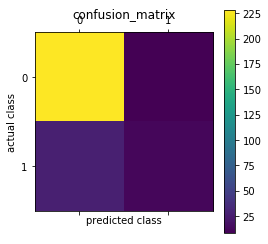

In [10]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import math
import types 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#cvs文件处理为np矩阵
def load_ndarray(csv_file,label):
    #连续数据离散化 LR模型常用的特征工程
    def continuous_discrete(item):
        if type(item) == type(1) or type(item) == type(1.1):
            if item > 0: 
                return int(math.log10(item))
            else:
                return 0
        else:
            return item
    df = pd.read_csv(csv_file)
    for item in df.columns:
        if item == label:
            continue
        df[item] = df[item].map(continuous_discrete)
    return pd.get_dummies(df).as_matrix()
#从np矩阵中读取X和Y
def get_X_Y(np_ndarray, label_col):
    if label_col == 0:
        X = np_ndarray[:,1:]
    elif label_col == 1:
        #将一维数组转换为矩阵
        def get_2dimension(np_ndarray):
            _2dimesension = []
            for item in np_ndarray:
                _list = [item]
                _2dimesension.append(_list)
            return _2dimesension
        X = np.concatenate((get_2dimension(np_ndarray[:,0]),np_ndarray[:,2:]), 1)
    elif label_col == -1:
        X = np_ndarray[:,:-1]
    else:
        X= np.concatenate((np_ndarray[:,label_col], np_ndarray[:,label_col + 1]), 1)
    Y = np_ndarray[:,label_col]
    return X, Y
#打印结果
def result_print(list):
    for item in list:
        print(item)
#主函数
def main():
    train_np = load_ndarray('pfm_train.csv','Attrition')
    #test_np = load_ndarray('test.csv','Attrition')
    X,Y = get_X_Y(train_np,1)
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)
    model = LogisticRegression()
    model.fit(X_train,Y_train)
    result = model.predict(X_test)
    acc_calc = accuracy_score(Y_test, result)
    hx = confusion_matrix(Y_test, result)
    print(hx)
    print(acc_calc)
    #result_print(result)
    plt.matshow(hx)
    plt.title('confusion_matrix')
    plt.colorbar()
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.show()
    
    
#程序入口
if __name__ == "__main__":
    main()
